In [1]:
import os
import re
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from __future__ import unicode_literals
import matplotlib
matplotlib.rc('font', family='Verdana')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

## Разметка текстовых данных
Чтобы перевести тексты в графовую форму, мы разметим их при помощи парсера udpipe,
раазмечающего морфологию и синтаксис в формате conll-u, что нам и нужно, так как такое представление годится для представления графолвых структур.

In [ ]:
# разметка производилась командой
os.system('/home/tsha/udpipe/src/udpipe --tokenize /home/tsha/models/syntagrus-default.udpipe  --tokenizer="normalized_spaces" --tag --parse ' + os.path.join(path, str(i)+'.txt') + ' --outfile=' +os.path.join(path200, str(i)+'.conll')) 

In [3]:
# файлы выглядят вот так:
WDIR= r'D:\Subtitles_norm\texts_tagged\12 Monkeys'
file = open(os.path.join(WDIR, r'12 Monkeys - 1x01 - Splinter.HDTV.KILLERS.ru.txt'), 'r', encoding='utf8').read().split('# newpar')
print(file[26])
    


# sent_id = 9709
# text = Черная смерть уничтожила почти всю Европу.
1	Черная	черный	ADJ	_	Case=Nom|Degree=Pos|Gender=Fem|Number=Sing	2	amod	_	_
2	смерть	смерть	NOUN	_	Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing	3	nsubj	_	_
3	уничтожила	уничтожать	VERB	_	Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	0	root	_	_
4	почти	почти	ADV	_	Degree=Pos	5	advmod	_	_
5	всю	весь	DET	_	Case=Acc|Gender=Fem|Number=Sing	6	amod	_	_
6	Европу	европа	PROPN	_	Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing	3	obj	_	SpaceAfter=No
7	.	.	PUNCT	_	_	6	punct	_	_




## Загружаем размеченные данные
Новости
Худлит
Соцсети
Стихи
Субтитры


In [4]:
# граф предложения
def make_corpus_graph(sents): #список предложений, строим общий граф по всем
    C  = nx.Graph()
    
    for sent in sents:
        try:
            lines = [s for s in sent.split('\n') if not s.startswith('#')]
            lines = [s for s in lines if '\t' in s]

            node_dic = {} #словарь вершин - номеров строк и их pos-тегов (1ая и 4ая колонка)
            edge_dic = {} #словарь связей - номеров строк и номера строки вершины (1ая и 4ая колонка)
            node_dic['0'] = 'root'
            for line in lines:

                s = line.split('\t')

                node_dic[s[0]]=s[3]
                edge_dic[s[0]]=s[6]
            C.add_nodes_from(node_dic.values())

            #print([(node_dic[i], node_dic[edge_dic[i]] ) for i in edge_dic])
            C.add_edges_from([(node_dic[i], node_dic[edge_dic[i]] ) for i in edge_dic])
        except:
            continue
    
    return C

In [5]:
# граф по частям речи общий
def make_pos_graph(sent):
    P  = nx.Graph()
    try:
        lines = [s for s in sent.split('\n') if not s.startswith('#')]
        lines = [s for s in lines if '\t' in s]

        node_dic = {} #словарь вершин - номеров строк и их pos-тегов (1ая и 4ая колонка)
        edge_dic = {} #словарь связей - номеров строк и номера строки вершины (1ая и 4ая колонка)
        node_dic['0'] = 'root'
        for line in lines:

            s = line.split('\t')

            node_dic[s[0]]=s[3]
            edge_dic[s[0]]=s[6]
        P.add_nodes_from(node_dic.values())
        P.add_edges_from([(node_dic[i], node_dic[edge_dic[i]] ) for i in edge_dic])
    except:
        pass
    return P

In [6]:
# граф по частям речи общий
def make_pos_graph_linear(sent):
    P  = nx.Graph()
    try:
        lines = [s for s in sent.split('\n') if not s.startswith('#')]
        lines = [s for s in lines if '\t' in s]

        node_dic = {} #словарь вершин - номеров строк и их pos-тегов (1ая и 4ая колонка)
        edge_dic = {} #словарь связей - номеров строк и номера строки вершины (1ая и 4ая колонка)
        #node_dic['0'] = 'root'
        P.add_node('root')
        nodes = [line.split('\t')[3] for line in lines]

        P.add_nodes_from(nodes)
        P.add_edges_from([(nodes[i], nodes[i+1]) for i in range(len(nodes)-1)])
        P.add_edge('root',nodes[0])
    except:
        pass
    return P

In [7]:
# граф по частям речи общий
def make_pos_graph_tags(sent):
    P  = nx.Graph()
    
    lines = [s for s in sent.split('\n') if not s.startswith('#')]
    lines = [s for s in lines if '\t' in s]
    
    node_dic = {} #словарь вершин - номеров строк и их pos-тегов (1ая и 4ая колонка)
    edge_dic = {} #словарь связей - номеров строк и номера строки вершины (1ая и 4ая колонка)
    node_dic['0'] = 'root'
    for line in lines:
        
        s = line.split('\t')
        node_dic[s[0]]=s[3]+s[5]
        edge_dic[s[0]]=s[6]
    P.add_nodes_from(node_dic.values())
    #print(node_dic.keys())
    P.add_edges_from([(node_dic[i], node_dic[edge_dic[i]] ) for i in edge_dic])
    return P

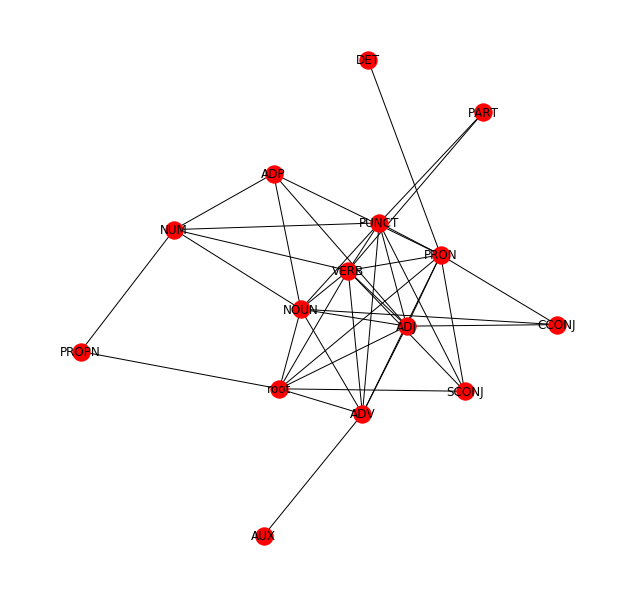

In [31]:
sents =  file[1:20]
C = make_corpus_graph(sents)
pos = nx.spring_layout(C)
plt.figure(figsize=(8, 8))
#nx.draw_networkx_labels(W,pos)
nx.draw(C, with_labels = True)
plt.show()

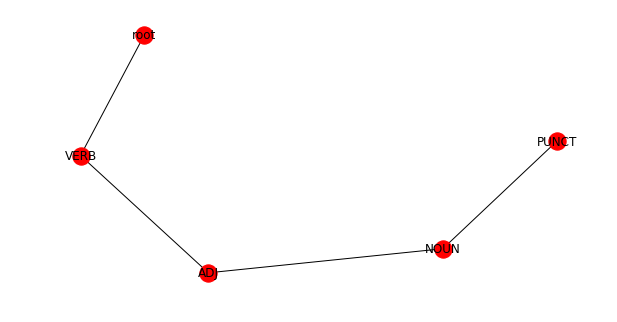

In [99]:
W = make_pos_graph_linear(file[24])
pos = nx.spring_layout(W)
plt.figure(figsize=(8, 4))
nx.draw(W, with_labels = True)
plt.show()

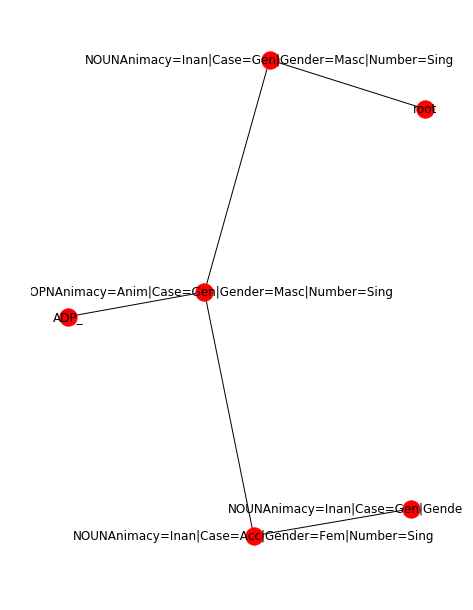

In [36]:
W = make_pos_graph_tags(file[23])
pos = nx.spring_layout(W)
plt.figure(figsize=(6, 8))
nx.draw(W, with_labels = True)
plt.show()

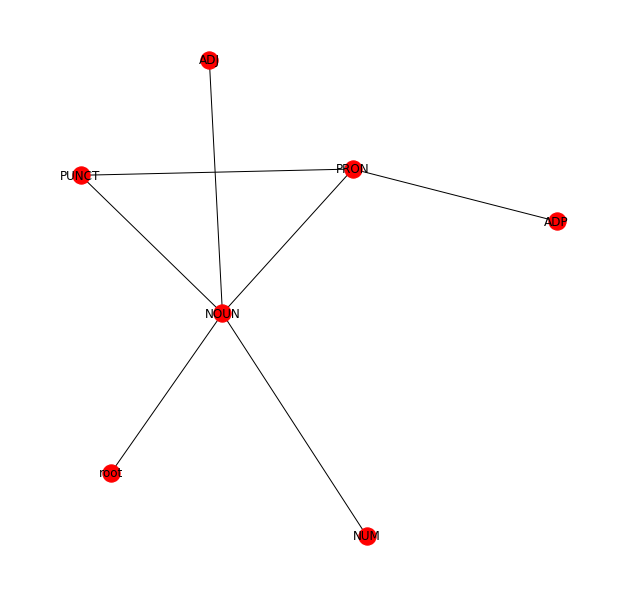

In [37]:
W = make_pos_graph(file[22])
pos = nx.spring_layout(W)
plt.figure(figsize=(8, 8))
#nx.draw_networkx_labels(W,pos)
nx.draw(W, with_labels = True)
plt.show()

## Получаем 10 000 случайных предложений из каждого жанра:
1. Новости
+ Твиттер
+ Худлит
+ Научпоп

In [8]:
WDIR = r'D:'
folders = ['Lenta',  'Magazines', 'NPlus1']
num = 10000
lenta_sents, mags_sents, nplus1_sents, twit_sents = [],[],[],[]

In [44]:

fpath = os.path.join(os.path.join(WDIR, 'Lenta'), 'texts_tagged')
files = random.sample(os.listdir(fpath),2000)
while len(lenta_sents) <num:
    for file in files:
        filer = open(os.path.join(fpath, file), 'r', encoding='utf8').read().split('# sent_id')
        s = random.sample(filer[1:], random.choice(range(1,len(filer))))
        for sent in s:
            lenta_sents.append(sent)


In [46]:
len(lenta_sents)

10102

In [68]:
mags_sents = []
fpath = os.path.join(os.path.join(WDIR, 'Magazines'), 'texts_tagged')
files = random.sample(os.listdir(fpath),2000)
while len(mags_sents) <num:
    for file in files:
        filer = open(os.path.join(fpath, file), 'r', encoding='utf8').read().split('# sent_id')
        s = random.sample(filer[1:], random.choice(range(1,len(filer))))
        for sent in s:
            mags_sents.append(sent)
            if len(mags_sents) <num:
                break
len(mags_sents)

10066

In [69]:
nplus1_sents = []
fpath = os.path.join(os.path.join(WDIR, 'NPlus1'), 'texts_tagged')
files = random.sample(os.listdir(fpath),2000)
while len(nplus1_sents) <num:
    for file in files:
        filer = open(os.path.join(fpath, file), 'r', encoding='utf8').read().split('# sent_id')
        s = random.sample(filer[1:], random.choice(range(1,len(filer))))
        for sent in s:
            nplus1_sents.append(sent)
len(nplus1_sents)

13630

In [70]:
twit_sents = []
twitter = os.path.join(os.path.join(WDIR, 'social'), 'twtexts.conll')
filer = open(twitter, 'r', encoding='utf8').read().split('# sent_id')
while len(twit_sents) <num:
    s = random.sample(filer[1:], 10000)
    for sent in s:
        twit_sents.append(sent)
len(twit_sents)

10000

## Изучим признаки графов по предложениям и по выборкам предложений

In [9]:
def save_graph(G, path, graphname):
    nx.write_gexf(G, os.path.join(path, graphname+'.gexf'))

In [26]:
def get_graph_info(W):
    
    nodes = W.number_of_nodes()
    edges = W.number_of_edges()
    try:
        rad = nx.radius(W)
    except:
        rad = 0
    try:
        diam = nx.diameter(W)
    except:   
        diam = 0
    try:    
        ac = nx.average_clustering(W)
    except:   
        ac = 0
    ac = nx.average_clustering(W)
    tr = nx.transitivity(W)
    den = nx.density(W)
    try:
        pc = nx.degree_pearson_correlation_coefficient(W)
    except:
        pc = 0
    deg = nx.degree_centrality(W)
    
    return nodes, edges, rad, diam, ac, tr, den, pc, deg

In [11]:
def get_center_nodes(W, n):
    deg = nx.degree_centrality(W)
    # n самых центральных узлов 
    center_list = []
    for nodeid in sorted(deg, key=deg.get, reverse=True):
        center_list.append(nodeid)
    return center_list[:n]

In [58]:
def ensure_dir(directory):

    if not os.path.exists(directory):
        os.makedirs(directory)
    return directory

In [63]:
graph_path = os.path.join(WDIR, 'graphs')
lenta_save = ensure_dir(os.path.join(os.path.join(graph_path,'Lenta' ),'pos_graphs_for_sent'))
mags_save = ensure_dir(os.path.join(os.path.join(graph_path,'Magazines' ),'pos_graphs_for_sent'))
nplus1_save = ensure_dir(os.path.join(os.path.join(graph_path,'NPlus1' ),'pos_graphs_for_sent'))
twit_save = ensure_dir(os.path.join(os.path.join(graph_path,'Twitter' ),'pos_graphs_for_sent'))
twit_save

'D:graphs\\Twitter\\pos_graphs_for_sent'

In [81]:
for s in range(len(lenta_sents[:10000])):
    G = make_pos_graph(lenta_sents[s])
    
    save_graph(G, lenta_save, str(s))

In [84]:
for s in range(len(mags_sents[:10000])):
    try:
        G = make_pos_graph(mags_sents[s])
    except:
        print(s)
    save_graph(G, mags_save, str(s))

8
59
78
94
126
128
136
138
181
183
220
225
264
287
304
310
366
371
372
428
453
473
478
499
550
600
654
667
695
733
742
750
780
821
828
833
846
867
937
938
973
981
1014
1076
1080
1116
1123
1165
1166
1176
1227
1231
1265
1296
1313
1322
1358
1436
1439
1521
1535
1539
1552
1582
1606
1619
1665
1673
1709
1766
1779
1784
1848
1872
1879
1884
1943
1989
2008
2059
2078
2094
2126
2128
2136
2138
2181
2183
2220
2225
2264
2287
2304
2310
2366
2371
2372
2428
2453
2473
2478
2499
2550
2600
2654
2667
2695
2733
2742
2750
2780
2821
2828
2833
2846
2867
2937
2938
2973
2981
3014
3076
3080
3116
3123
3165
3166
3176
3227
3231
3265
3296
3313
3322
3358
3436
3439
3521
3535
3539
3552
3582
3606
3619
3665
3673
3709
3766
3779
3784
3848
3872
3879
3884
3943
3989
4008
4059
4078
4094
4126
4128
4136
4138
4181
4183
4220
4225
4264
4287
4304
4310
4366
4371
4372
4428
4453
4473
4478
4499
4550
4600
4654
4667
4695
4733
4742
4750
4780
4821
4828
4833
4846
4867
4937
4938
4973
4981
5014
5076
5080
5116
5123
5165
5166
5176
5227
5231
5265
52

In [85]:
for s in range(len(twit_sents[:10000])):
    G = make_pos_graph(twit_sents[s])
    save_graph(G, twit_save, str(s))

In [73]:
for s in range(len(nplus1_sents[:10000])):
    G = make_pos_graph(nplus1_sents[s])
    save_graph(G, nplus1_save, str(s))

In [100]:
lenta_save = ensure_dir(os.path.join(os.path.join(graph_path,'Lenta' ),'pos_graphs_for_sent_linear'))
mags_save = ensure_dir(os.path.join(os.path.join(graph_path,'Magazines' ),'pos_graphs_for_sent_linear'))
nplus1_save = ensure_dir(os.path.join(os.path.join(graph_path,'NPlus1' ),'pos_graphs_for_sent_linear'))
twit_save = ensure_dir(os.path.join(os.path.join(graph_path,'Twitter' ),'pos_graphs_for_sent_linear'))
twit_save

'D:graphs\\Twitter\\pos_graphs_for_sent_linear'

In [115]:
for s in range(len(lenta_sents[:10000])):
    try:
        G = make_pos_graph_linear(lenta_sents[s])
        save_graph(G, lenta_save, str(s))
    except:
        continue
    

In [116]:
for s in range(len(mags_sents[:10000])):
    try:
        G = make_pos_graph_linear(mags_sents[s])
        save_graph(G, mags_save, str(s))
    except:
        continue
    

In [117]:
for s in range(len(twit_sents[:10000])):
    try:
        G = make_pos_graph_linear(twit_sents[s])
        save_graph(G, twit_save, str(s))
    except:
        continue    
    

In [118]:
for s in range(len(nplus1_sents[:10000])):
    try:
        G = make_pos_graph_linear(nplus1_sents[s])
        save_graph(G, nplus1_save, str(s))
    except:
        continue    
    

In [119]:
lenta_save = ensure_dir(os.path.join(os.path.join(graph_path,'Lenta' ),'pos_graphs_for_corpus'))
mags_save = ensure_dir(os.path.join(os.path.join(graph_path,'Magazines' ),'pos_graphs_for_corpus'))
nplus1_save = ensure_dir(os.path.join(os.path.join(graph_path,'NPlus1' ),'pos_graphs_for_corpus'))
twit_save = ensure_dir(os.path.join(os.path.join(graph_path,'Twitter' ),'pos_graphs_for_corpus'))
twit_save

'D:graphs\\Twitter\\pos_graphs_for_corpus'

In [123]:
G = make_corpus_graph(twit_sents[:10000])
save_graph(G, twit_save, str(s))

    

In [124]:
G = make_corpus_graph(nplus1_sents[:10000])
save_graph(G, nplus1_save, str(s))

In [127]:
G = make_corpus_graph(mags_sents[:10000])
save_graph(G, mags_save, str(s))

## Посчитаем фичи для каждого графа

In [128]:
lenta_graph_feats, mags_graph_feats, nplus1_graph_feats, twit_graph_feats = [], [],[],[]

In [144]:
labels = ['nodes', 'edges', 'radius', 'diameter', 'average_clustering', 'transitivity', 'density', 'degree_pearson_correlation_coefficient','degree_centrality']
C =  make_corpus_graph(lenta_sents[:10000])
lenta_graph_feats = get_graph_info(C)

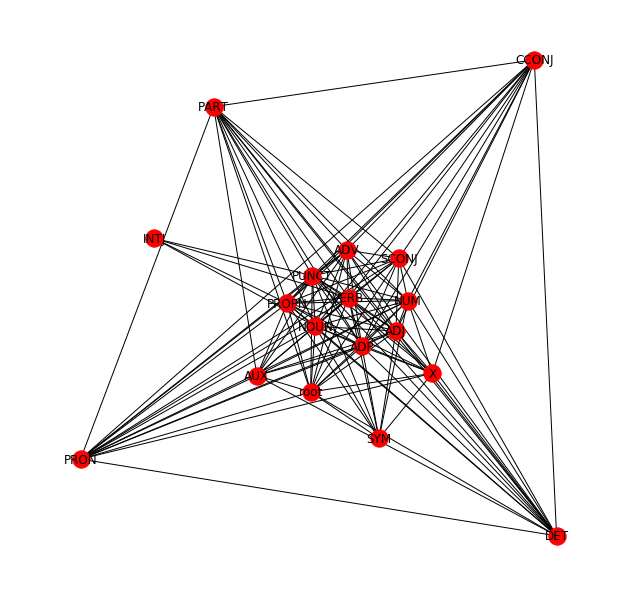

In [134]:
pos = nx.spring_layout(C)
plt.figure(figsize=(8, 8))
nx.draw(C, with_labels = True)
plt.show()

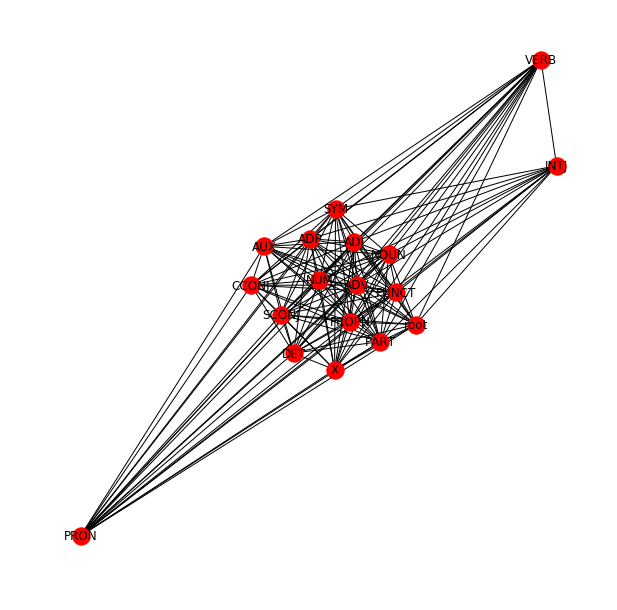

In [149]:
T =  make_corpus_graph(twit_sents[:10000])
twit_graph_feats = get_graph_info(T)
pos = nx.spring_layout(T)
plt.figure(figsize=(8, 8))
nx.draw(T, with_labels = True)
plt.show()

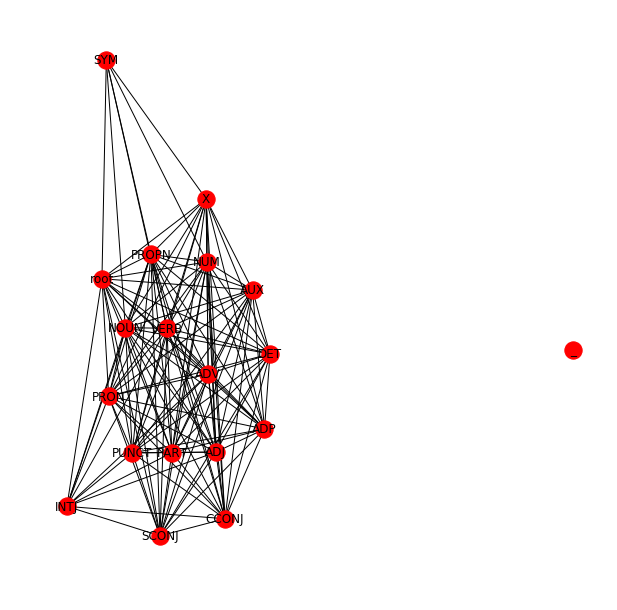

In [142]:
M =  make_corpus_graph(mags_sents[:10000])
mags_graph_feats = get_graph_info(M)
pos = nx.spring_layout(M)
plt.figure(figsize=(8, 8))
nx.draw(M, with_labels = True)
plt.show()

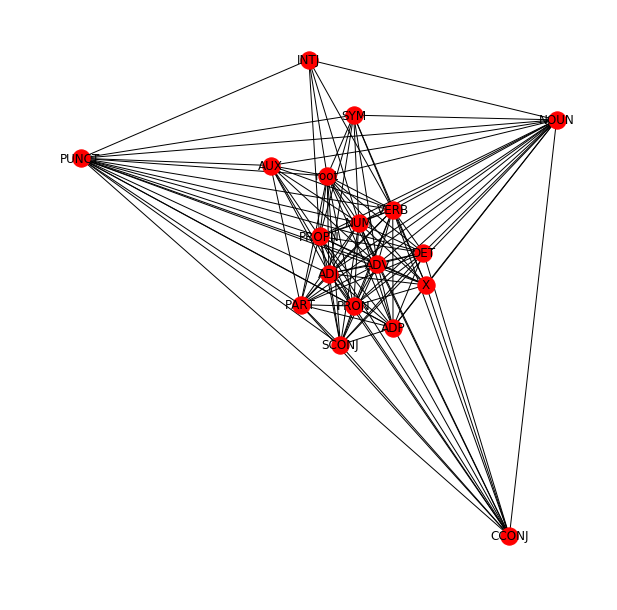

In [143]:
N =  make_corpus_graph(nplus1_sents[:10000])
nplus1_graph_feats = get_graph_info(N)
pos = nx.spring_layout(N)
plt.figure(figsize=(8, 8))
nx.draw(N, with_labels = True)
plt.show()

In [151]:

l = pd.Series(lenta_graph_feats, index=labels)
n = pd.Series(nplus1_graph_feats, index=labels)
m = pd.Series(mags_graph_feats, index=labels)
t = pd.Series(twit_graph_feats, index=labels)
corpus_graphs = pd.DataFrame.from_items([('news', l), ('pop-sci', n), ('fiction', m), ('twitter',t)])

In [152]:
corpus_graphs

,news,pop-sci,fiction,twitter
nodes,18,18,19,18
edges,140,140,148,159
radius,1,1,0,1
diameter,2,2,0,2
average_clustering,0.913331,0.902205,0.884348,0.956143
transitivity,0.890815,0.874057,0.925565,0.953309
density,0.915033,0.915033,0.865497,1.03922
degree_pearson_correlation_coefficient,-0.224622,-0.241302,-0.121837,-0.147224
degree_centrality,"{'root': 0.8823529411764706, 'NOUN': 1.1176470...","{'root': 0.9411764705882353, 'ADP': 0.94117647...","{'root': 0.8888888888888888, 'ADV': 1.0, 'NOUN...","{'root': 0.9411764705882353, 'CCONJ': 0.882352..."


## И посчитаем среднее, медиану, макс и мин, стд для графов предложений

In [12]:
def mean_values(corpus):
    list_of_feats = []
    for s in corpus:
        G = make_pos_graph(s)
        L = make_pos_graph_linear(s)
        
        if G.number_of_nodes()+L.number_of_nodes()>2:
            l1 = get_graph_info(G)
            l2 = get_graph_info(L)
            list_of_feats.append(l1[:-1]+l2[:-1])
        else:
            list_of_feats.append([0 for i in range(16)])
    #nodes, edges, rad, diam, ac, tr, den, pc + nodes, edges, rad, diam, ac, tr, den, pc
    medians = [np.median([elem[i] for elem in list_of_feats]) for i in range(16) ]
    means = [np.mean([elem[i] for elem in list_of_feats]) for i in range(16) ]
    maxs = [np.max([elem[i] for elem in list_of_feats]) for i in range(16) ]
    mins = [np.min([elem[i] for elem in list_of_feats]) for i in range(16) ]
    stds = [np.std([elem[i] for elem in list_of_feats]) for i in range(16) ]
    return medians, means, maxs, mins, stds

In [189]:
#lenta
l_medians, l_means, l_maxs, l_mins, l_stds =  mean_values(lenta_sents[:10000])

In [192]:
#mags
m_medians, m_means, m_maxs, m_mins, m_stds =  mean_values(mags_sents[:10000])

In [191]:
#nplus1
n_medians, n_means, n_maxs, n_mins, n_stds =  mean_values(nplus1_sents[:10000])

In [193]:
#twitter
t_medians, t_means, t_maxs, t_mins, t_stds =  mean_values(twit_sents[:10000])

In [195]:
labels = ['nodes_synt', 'edges_synt', 'radius_synt', 'diameter_synt', 'average_clustering_synt', 'transitivity_synt', 'density_synt', 'degree_pearson_correlation_coefficien_syntt', 'nodes_flat', 'edges_flat', 'radius_flat', 'diameter_flat', 'average_clustering_flat', 'transitivity_flat', 'density_flat', 'degree_pearson_correlation_coefficient_flat']


In [196]:
#медианы
l = pd.Series(l_medians, index=labels)
n = pd.Series(n_medians, index=labels)
m = pd.Series(m_medians, index=labels)
t = pd.Series(t_medians, index=labels)
corpus_graphs = pd.DataFrame.from_items([('news', l), ('pop-sci', n), ('fiction', m), ('twitter',t)])
corpus_graphs

,news,pop-sci,fiction,twitter
nodes_synt,9.000000,8.000000,8.000000,9.000000
edges_synt,12.000000,11.000000,10.000000,14.000000
radius_synt,2.000000,2.000000,2.000000,2.000000
diameter_synt,3.000000,3.000000,3.000000,3.000000
average_clustering_synt,0.220738,0.175000,0.189286,0.333333
transitivity_synt,0.206897,0.166667,0.176471,0.321429
density_synt,0.321429,0.333333,0.348485,0.371795
degree_pearson_correlation_coefficien_syntt,-0.446304,NaN,NaN,NaN
nodes_flat,9.000000,8.000000,8.000000,9.000000
edges_flat,14.000000,13.000000,10.000000,16.000000


In [197]:
#средние
l = pd.Series(l_means, index=labels)
n = pd.Series(n_means, index=labels)
m = pd.Series(m_means, index=labels)
t = pd.Series(t_means, index=labels)
corpus_graphs = pd.DataFrame.from_items([('news', l), ('pop-sci', n), ('fiction', m), ('twitter',t)])
corpus_graphs

,news,pop-sci,fiction,twitter
nodes_synt,8.376000,8.043600,7.629500,9.257600
edges_synt,12.068100,10.755800,10.260000,15.184500
radius_synt,1.749900,1.791600,1.685600,1.863800
diameter_synt,2.814000,2.918400,2.780500,3.059600
average_clustering_synt,0.218542,0.183055,0.200440,0.304659
transitivity_synt,0.194783,0.162017,0.186216,0.281272
density_synt,0.311408,0.323532,0.384099,0.402733
degree_pearson_correlation_coefficien_syntt,-0.408947,NaN,NaN,NaN
nodes_flat,8.376000,8.043600,7.629500,9.257600
edges_flat,14.554300,12.920100,11.715500,17.767400


In [198]:
#максимумы
l = pd.Series(l_maxs, index=labels)
n = pd.Series(n_maxs, index=labels)
m = pd.Series(m_maxs, index=labels)
t = pd.Series(t_maxs, index=labels)
corpus_graphs = pd.DataFrame.from_items([('news', l), ('pop-sci', n), ('fiction', m), ('twitter',t)])
corpus_graphs

,news,pop-sci,fiction,twitter
nodes_synt,16.000000,16.000000,16.000000,17.000000
edges_synt,48.000000,37.000000,60.000000,51.000000
radius_synt,3.000000,3.000000,3.000000,3.000000
diameter_synt,5.000000,6.000000,6.000000,6.000000
average_clustering_synt,0.833333,0.866667,1.000000,0.833333
transitivity_synt,0.882353,0.750000,1.000000,0.767442
density_synt,2.000000,2.000000,2.000000,2.000000
degree_pearson_correlation_coefficien_syntt,0.356725,NaN,NaN,NaN
nodes_flat,16.000000,16.000000,16.000000,17.000000
edges_flat,58.000000,45.000000,77.000000,70.000000


In [199]:
#минимумы
l = pd.Series(l_mins, index=labels)
n = pd.Series(n_mins, index=labels)
m = pd.Series(m_mins, index=labels)
t = pd.Series(t_mins, index=labels)
corpus_graphs = pd.DataFrame.from_items([('news', l), ('pop-sci', n), ('fiction', m), ('twitter',t)])
corpus_graphs

,news,pop-sci,fiction,twitter
nodes_synt,0.0,0.0,0.0,2.000000
edges_synt,0.0,0.0,0.0,1.000000
radius_synt,0.0,0.0,0.0,1.000000
diameter_synt,0.0,0.0,0.0,1.000000
average_clustering_synt,0.0,0.0,0.0,0.000000
transitivity_synt,0.0,0.0,0.0,0.000000
density_synt,0.0,0.0,0.0,0.175824
degree_pearson_correlation_coefficien_syntt,-1.0,NaN,NaN,NaN
nodes_flat,0.0,0.0,0.0,2.000000
edges_flat,0.0,0.0,0.0,1.000000


In [200]:
#среднеквадратичное отклонение
l = pd.Series(l_stds, index=labels)
n = pd.Series(n_stds, index=labels)
m = pd.Series(m_stds, index=labels)
t = pd.Series(t_stds, index=labels)
corpus_graphs = pd.DataFrame.from_items([('news', l), ('pop-sci', n), ('fiction', m), ('twitter',t)])
corpus_graphs

,news,pop-sci,fiction,twitter
nodes_synt,3.577544,3.090162,3.187606,3.209866
edges_synt,6.608817,5.259598,6.602696,8.722331
radius_synt,0.651728,0.594785,0.607579,0.394017
diameter_synt,1.088946,1.017419,0.981896,0.646875
average_clustering_synt,0.186482,0.174359,0.198248,0.211663
transitivity_synt,0.161997,0.148598,0.183947,0.183968
density_synt,0.143337,0.129959,0.208718,0.143768
degree_pearson_correlation_coefficien_syntt,0.203030,NaN,NaN,NaN
nodes_flat,3.577544,3.090162,3.187606,3.209866
edges_flat,8.622381,6.666762,8.054785,11.349242


## Посмотрим, как наши тексты распределились!

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pylab as pl

Для этого сделаем датасет с метриками по каждому тексту

In [13]:
def mean_values(corpus, clas):
    list_of_feats = []
    for s in corpus:
        G = make_pos_graph(s)
        L = make_pos_graph_linear(s)
        
        if G.number_of_nodes()+L.number_of_nodes()>2:
            l1 = list(get_graph_info(G))
            l2 = list(get_graph_info(L))
            list_of_feats.append(l1[:-1]+l2[:-1]+[clas])
        else:
            list_of_feats.append([0 for i in range(16)]+[clas])
    #nodes, edges, rad, diam, ac, tr, den, pc + nodes, edges, rad, diam, ac, tr, den, pc
    medians = [np.median([elem[i] for elem in list_of_feats]) for i in range(16) ]
    means = [np.mean([elem[i] for elem in list_of_feats]) for i in range(16) ]
    maxs = [np.max([elem[i] for elem in list_of_feats]) for i in range(16) ]
    mins = [np.min([elem[i] for elem in list_of_feats]) for i in range(16) ]
    stds = [np.std([elem[i] for elem in list_of_feats]) for i in range(16) ]
    return medians, means, maxs, mins, stds

In [15]:
def get_text_info(s, clas):
    list_of_feats = []
    G = make_pos_graph(s)
    L = make_pos_graph_linear(s)
        
    if G.number_of_nodes()+L.number_of_nodes()>2:
        l1 = list(get_graph_info(G))
        l2 = list(get_graph_info(L))
        list_of_feats.append(l1[:-1]+l2[:-1]+[clas])
    else:
        list_of_feats.append([0 for i in range(16)]+[clas])

    return list_of_feats[0]

In [24]:
data_text = []
labels = ['nodes_synt', 'edges_synt', 'radius_synt', 'diameter_synt', 'average_clustering_synt', 'transitivity_synt', 'density_synt', 'degree_pearson_correlation_coefficien_syntt', 'nodes_flat', 'edges_flat', 'radius_flat', 'diameter_flat', 'average_clustering_flat', 'transitivity_flat', 'density_flat', 'degree_pearson_correlation_coefficient_flat', 'class']
WDIR = r'D:\\'

In [25]:
fpath = os.path.join(os.path.join(WDIR, 'Lenta'), 'texts_tagged')
files = random.sample(os.listdir(fpath),10000)
for file in files:
    filer = open(os.path.join(fpath, file), 'r', encoding='utf8').read().split('# sent_id')
    list_of_feats = mean_values(filer[1:], 'news')
    data_text.append(list_of_feats)

In [28]:
fpath = os.path.join(os.path.join(WDIR, 'Magazines'), 'texts_tagged')
files = random.sample(os.listdir(fpath),10000)
for file in files:
    filer = open(os.path.join(fpath, file), 'r', encoding='utf8').read().split('# sent_id')
    list_of_feats = mean_values(filer[1:], 'fiction')
    data_text.append(list_of_feats)

In [30]:
fpath = os.path.join(os.path.join(WDIR, 'NPlus1'), 'texts_tagged')
files = random.sample(os.listdir(fpath),5000)
for file in files:
    filer = open(os.path.join(fpath, file), 'r', encoding='utf8').read().split('# sent_id')
    list_of_feats = mean_values(filer[1:], 'pop-sci')
    data_text.append(list_of_feats)

In [33]:
twitter = os.path.join(os.path.join(WDIR, 'social'), 'twtexts.conll')
files = open(twitter, 'r', encoding='utf8').read().split('# sent_id')
files = random.sample(files,10000)
for file in files:
    
    list_of_feats = mean_values(file, 'twitter')
    data_text.append(list_of_feats)

In [42]:
classes = ['news']*10000+['fiction']*10000+['pop-sci']*5000+['twitter']*10000

In [39]:
med_data = [i[1] for i in data_text]

In [43]:
labels = ['nodes_synt', 'edges_synt', 'radius_synt', 'diameter_synt', 'average_clustering_synt', 'transitivity_synt', 'density_synt', 'degree_pearson_correlation_coefficien_syntt', 'nodes_flat', 'edges_flat', 'radius_flat', 'diameter_flat', 'average_clustering_flat', 'transitivity_flat', 'density_flat', 'degree_pearson_correlation_coefficient_flat']
data = pd.DataFrame(med_data, columns=labels)
data['class'] = classes
data.head()

,nodes_synt,edges_synt,radius_synt,diameter_synt,average_clustering_synt,transitivity_synt,density_synt,degree_pearson_correlation_coefficien_syntt,nodes_flat,edges_flat,radius_flat,diameter_flat,average_clustering_flat,transitivity_flat,density_flat,degree_pearson_correlation_coefficient_flat,class
0,8.000000,10.769231,1.769231,2.923077,0.168851,0.147242,0.324598,-0.430593,8.000000,12.692308,2.000000,3.538462,0.318965,0.309002,0.371506,-0.251462,news
1,8.142857,11.571429,1.714286,2.714286,0.215291,0.193343,0.286559,-0.446462,8.142857,14.857143,1.714286,2.714286,0.315204,0.281633,0.356401,-0.301502,news
2,8.833333,12.500000,1.500000,2.500000,0.214183,0.134421,0.255938,-0.406212,8.833333,16.166667,1.833333,3.000000,0.406588,0.343567,0.340799,-0.158876,news
3,7.875000,12.875000,1.625000,2.500000,0.261878,0.273551,0.345147,-0.389626,7.875000,14.750000,1.750000,2.750000,0.351463,0.327231,0.377249,-0.217546,news
4,8.200000,10.900000,1.800000,2.900000,0.140219,0.130536,0.296313,-0.432954,8.200000,12.700000,2.000000,3.300000,0.255313,0.224584,0.338492,-0.302090,news


In [44]:
data.to_csv(path_or_buf=r'D:\graphs\texts_mean.csv', sep='\t')

In [45]:
print( 'Size of the dataframe: {}'.format(data.shape))

Size of the dataframe: (35000, 17)


In [46]:
data = data.fillna('0')
rndperm = np.random.permutation(data.shape[0])
feat_cols = data.columns[:-1]

In [47]:
pca = PCA(n_components=2)
feat_cols = data.columns[:-1]
pca_result = pca.fit_transform(data[feat_cols].values)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.98375498  0.01319278]


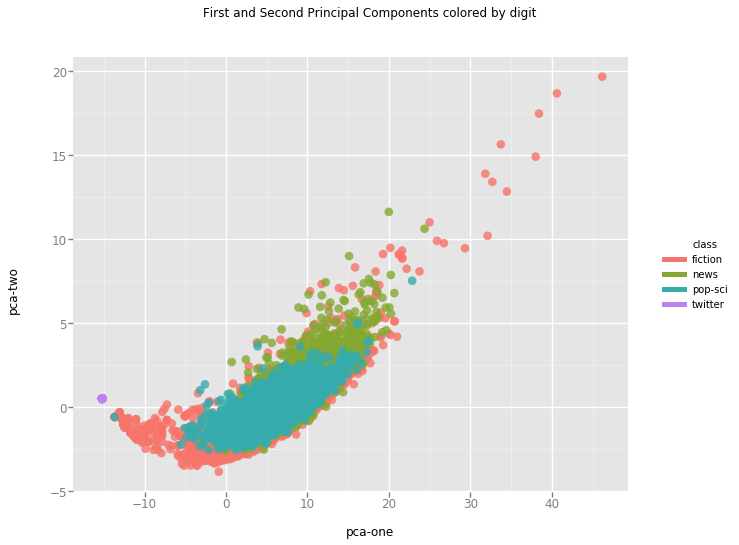

<ggplot: (106433656)>

In [48]:
from ggplot import *

chart = ggplot( data.loc[rndperm[:35000],:], aes(x='pca-one', y='pca-two', color='class') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [50]:
import time
from sklearn.manifold import TSNE

n_sne = 35000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=16, n_iter=300)
tsne_results = tsne.fit_transform(data.loc[rndperm[:n_sne],feat_cols].values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 35000 samples in 0.251s...
[t-SNE] Computed neighbors for 35000 samples in 4.983s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35000
[t-SNE] Computed conditional probabilities for sample 2000 / 35000
[t-SNE] Computed conditional probabilities for sample 3000 / 35000
[t-SNE] Computed conditional probabilities for sample 4000 / 35000
[t-SNE] Computed conditional probabilities for sample 5000 / 35000
[t-SNE] Computed conditional probabilities for sample 6000 / 35000
[t-SNE] Computed conditional probabilities for sample 7000 / 35000
[t-SNE] Computed conditional probabilities for sample 8000 / 35000
[t-SNE] Computed conditional probabilities for sample 9000 / 35000
[t-SNE] Computed conditional probabilities for sample 10000 / 35000
[t-SNE] Computed conditional probabilities for sample 11000 / 35000
[t-SNE] Computed conditional probabilities for sample 12000 / 35000
[t-SNE] Computed conditional probabilities for sam

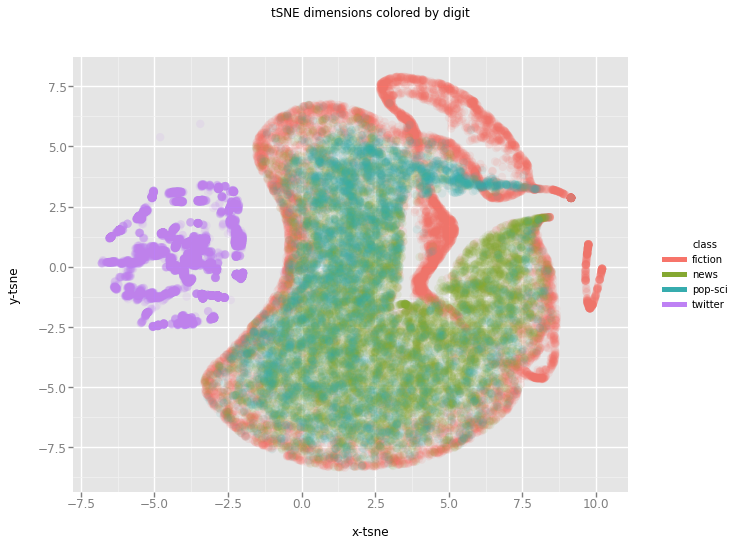

<ggplot: (-9223372036750092621)>

In [51]:
df_tsne = data.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='class') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [52]:
median_data = [i[0] for i in data_text]
data2 = pd.DataFrame(median_data, columns=labels)
data2['class'] = classes
data2.head()

,nodes_synt,edges_synt,radius_synt,diameter_synt,average_clustering_synt,transitivity_synt,density_synt,degree_pearson_correlation_coefficien_syntt,nodes_flat,edges_flat,radius_flat,diameter_flat,average_clustering_flat,transitivity_flat,density_flat,degree_pearson_correlation_coefficient_flat,class
0,9.0,11.0,2.0,3.0,0.184343,0.130435,0.361111,-0.412131,9.0,14.0,2.0,4.0,0.325926,0.272727,0.388889,-0.250000,news
1,8.0,12.0,2.0,3.0,0.246825,0.214286,0.333333,-0.520622,8.0,15.0,2.0,3.0,0.350000,0.333333,0.439394,-0.267019,news
2,9.5,13.0,2.0,3.0,0.159799,0.083333,0.261752,-0.426744,9.5,16.5,2.0,3.0,0.459249,0.331452,0.350427,-0.199394,news
3,7.5,10.0,2.0,3.0,0.363152,0.337895,0.366300,-0.380909,7.5,11.5,2.0,3.0,0.353770,0.389610,0.414408,-0.206694,news
4,9.0,12.0,2.0,3.0,0.142037,0.131429,0.333333,-0.456220,9.0,14.0,2.0,3.0,0.329630,0.271429,0.356349,-0.257413,news


In [53]:
data2.to_csv(path_or_buf=r'D:\graphs\texts_median.csv', sep='\t')

In [54]:
data2 = data2.fillna('0')
rndperm = np.random.permutation(data2.shape[0])

Explained variation per principal component: [ 0.97682592  0.01656319]


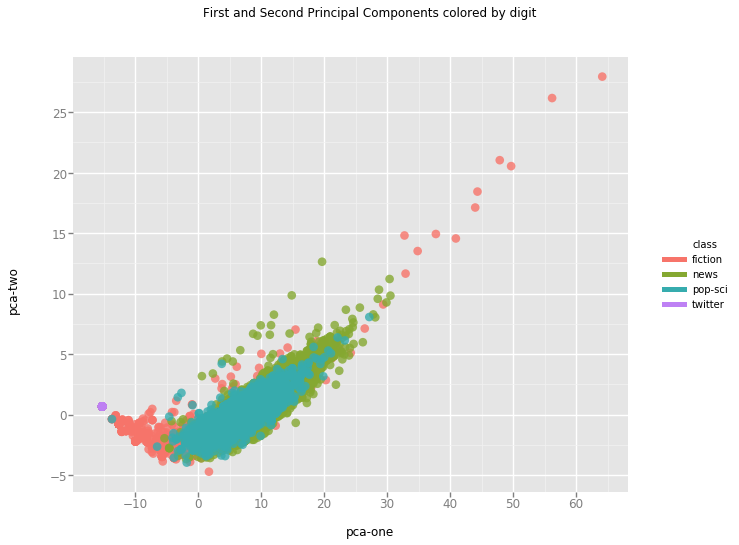

<ggplot: (54969215)>

In [58]:
pca = PCA(n_components=2)
feat_cols = data2.columns[:-1]
pca_result = pca.fit_transform(data2[feat_cols].values)
data2['pca-one'] = pca_result[:,0]
data2['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
chart = ggplot( data2.loc[rndperm[:35000],:], aes(x='pca-one', y='pca-two', color='class') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [56]:
n_sne = 35000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=16, n_iter=300)
tsne_results = tsne.fit_transform(data.loc[rndperm[:n_sne],feat_cols].values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 35000 samples in 0.243s...
[t-SNE] Computed neighbors for 35000 samples in 4.615s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35000
[t-SNE] Computed conditional probabilities for sample 2000 / 35000
[t-SNE] Computed conditional probabilities for sample 3000 / 35000
[t-SNE] Computed conditional probabilities for sample 4000 / 35000
[t-SNE] Computed conditional probabilities for sample 5000 / 35000
[t-SNE] Computed conditional probabilities for sample 6000 / 35000
[t-SNE] Computed conditional probabilities for sample 7000 / 35000
[t-SNE] Computed conditional probabilities for sample 8000 / 35000
[t-SNE] Computed conditional probabilities for sample 9000 / 35000
[t-SNE] Computed conditional probabilities for sample 10000 / 35000
[t-SNE] Computed conditional probabilities for sample 11000 / 35000
[t-SNE] Computed conditional probabilities for sample 12000 / 35000
[t-SNE] Computed conditional probabilities for sam

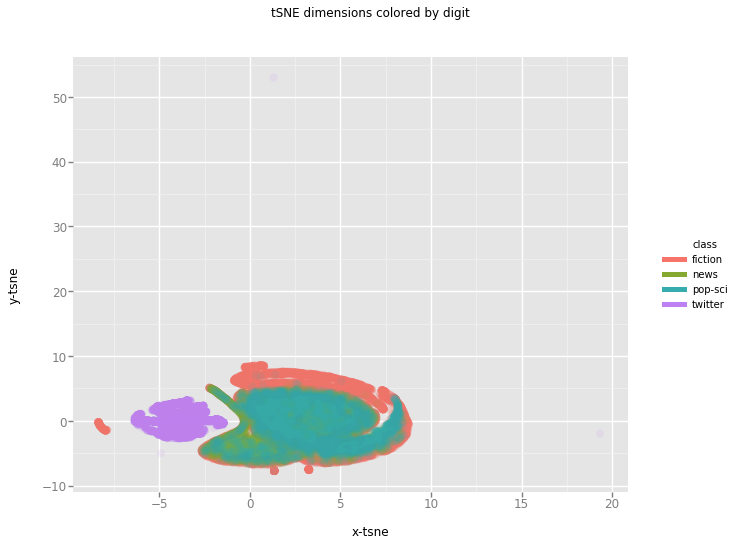

<ggplot: (104025569)>

In [57]:
df_tsne = data2.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='class') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [59]:
max_data = [i[2] for i in data_text]
data3 = pd.DataFrame(max_data, columns=labels)
data3['class'] = classes
data3.head()

,nodes_synt,edges_synt,radius_synt,diameter_synt,average_clustering_synt,transitivity_synt,density_synt,degree_pearson_correlation_coefficien_syntt,nodes_flat,edges_flat,radius_flat,diameter_flat,average_clustering_flat,transitivity_flat,density_flat,degree_pearson_correlation_coefficient_flat,class
0,11,21,2,4,0.491190,0.452055,0.464286,0.0,11,25,3,5,0.658333,0.623762,0.607143,0.015119,news
1,12,23,2,4,0.442593,0.379310,0.428571,0.0,12,29,2,4,0.688571,0.500000,0.535714,0.000000,news
2,13,21,2,4,0.510476,0.409091,0.466667,0.0,13,29,3,6,0.673810,0.684211,0.644444,0.049774,news
3,14,32,2,3,0.395833,0.461538,0.533333,0.0,14,37,2,4,0.687740,0.552632,0.500000,0.000000,news
4,11,16,2,4,0.330688,0.281250,0.392857,0.0,11,22,3,5,0.410000,0.375000,0.500000,0.000000,news


In [60]:
data3 = data3.fillna('0')
rndperm = np.random.permutation(data3.shape[0])

In [61]:
data3.to_csv(path_or_buf=r'D:\graphs\texts_max.csv', sep='\t')

In [62]:
pca = PCA(n_components=2)
feat_cols = data3.columns[:-1]
pca_result = pca.fit_transform(data3[feat_cols].values)
data3['pca-one'] = pca_result[:,0]
data3['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.97325493  0.0159457 ]


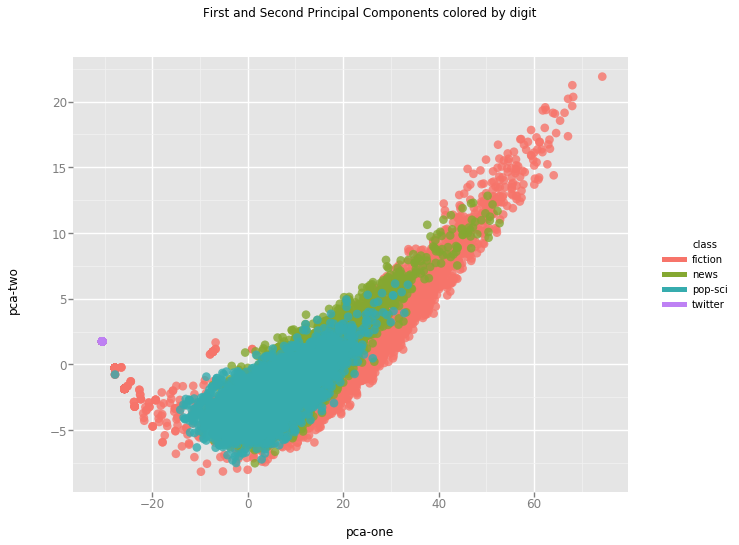

<ggplot: (-9223372036750754160)>

In [63]:

chart = ggplot( data3.loc[rndperm[:35000],:], aes(x='pca-one', y='pca-two', color='class') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [64]:
n_sne = 35000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=16, n_iter=300)
tsne_results = tsne.fit_transform(data3.loc[rndperm[:n_sne],feat_cols].values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 35000 samples in 0.243s...
[t-SNE] Computed neighbors for 35000 samples in 4.546s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35000
[t-SNE] Computed conditional probabilities for sample 2000 / 35000
[t-SNE] Computed conditional probabilities for sample 3000 / 35000
[t-SNE] Computed conditional probabilities for sample 4000 / 35000
[t-SNE] Computed conditional probabilities for sample 5000 / 35000
[t-SNE] Computed conditional probabilities for sample 6000 / 35000
[t-SNE] Computed conditional probabilities for sample 7000 / 35000
[t-SNE] Computed conditional probabilities for sample 8000 / 35000
[t-SNE] Computed conditional probabilities for sample 9000 / 35000
[t-SNE] Computed conditional probabilities for sample 10000 / 35000
[t-SNE] Computed conditional probabilities for sample 11000 / 35000
[t-SNE] Computed conditional probabilities for sample 12000 / 35000
[t-SNE] Computed conditional probabilities for sam

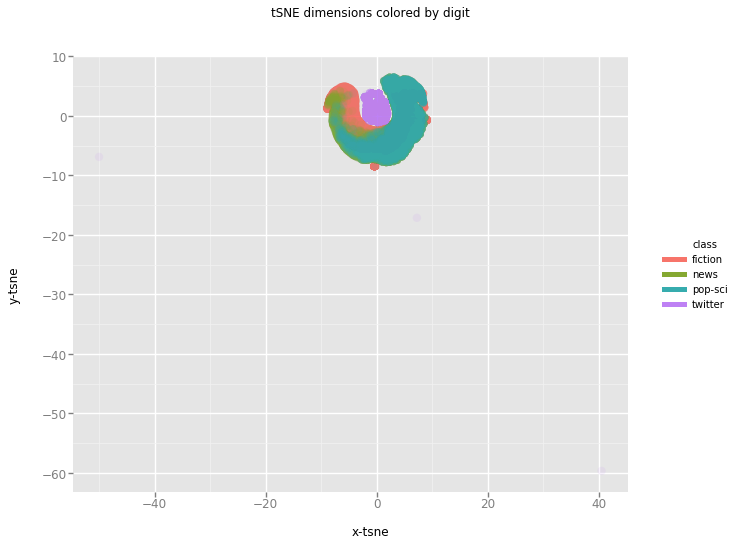

<ggplot: (-9223372036798647366)>

In [65]:
df_tsne = data3.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='class') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [66]:
std_data = [i[3] for i in data_text]
data4 = pd.DataFrame(std_data, columns=labels)
data4['class'] = classes
data4.head()

,nodes_synt,edges_synt,radius_synt,diameter_synt,average_clustering_synt,transitivity_synt,density_synt,degree_pearson_correlation_coefficien_syntt,nodes_flat,edges_flat,radius_flat,diameter_flat,average_clustering_flat,transitivity_flat,density_flat,degree_pearson_correlation_coefficient_flat,class
0,0,0,0,0,0.0,0.0,0.0,-0.677796,0,0,0,0,0.0,0.0,0.0,-0.530466,news
1,0,0,0,0,0.0,0.0,0.0,-0.632653,0,0,0,0,0.0,0.0,0.0,-0.776000,news
2,0,0,0,0,0.0,0.0,0.0,-0.762246,0,0,0,0,0.0,0.0,0.0,-0.370239,news
3,0,0,0,0,0.0,0.0,0.0,-0.833333,0,0,0,0,0.0,0.0,0.0,-0.466667,news
4,0,0,0,0,0.0,0.0,0.0,-0.668653,0,0,0,0,0.0,0.0,0.0,-0.750000,news


In [67]:
data4 = data4.fillna('0')
rndperm = np.random.permutation(data4.shape[0])

In [68]:
data4.to_csv(path_or_buf=r'D:\graphs\texts_std.csv', sep='\t')

In [69]:
pca = PCA(n_components=2)
feat_cols = data4.columns[:-1]
pca_result = pca.fit_transform(data4[feat_cols].values)
data4['pca-one'] = pca_result[:,0]
data4['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.51054881  0.46305633]


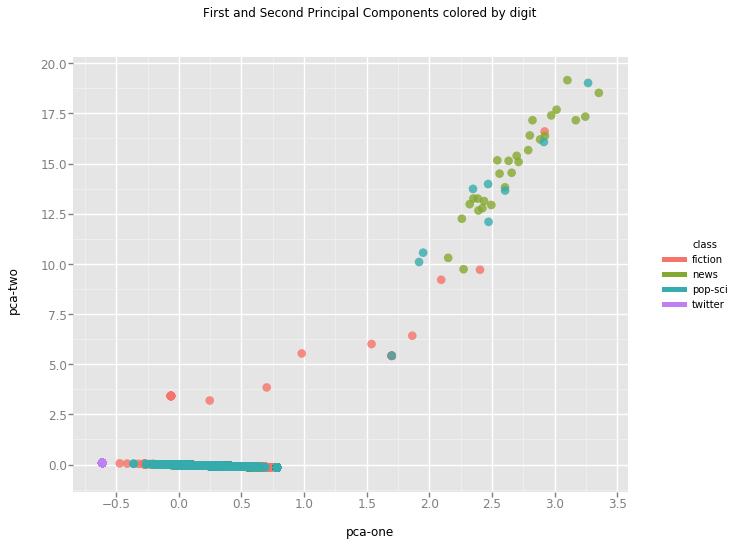

<ggplot: (-9223372036799435190)>

In [70]:

chart = ggplot( data4.loc[rndperm[:35000],:], aes(x='pca-one', y='pca-two', color='class') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [71]:
n_sne = 35000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=16, n_iter=300)
tsne_results = tsne.fit_transform(data4.loc[rndperm[:n_sne],feat_cols].values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 35000 samples in 1.562s...
[t-SNE] Computed neighbors for 35000 samples in 7.839s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35000
[t-SNE] Computed conditional probabilities for sample 2000 / 35000
[t-SNE] Computed conditional probabilities for sample 3000 / 35000
[t-SNE] Computed conditional probabilities for sample 4000 / 35000
[t-SNE] Computed conditional probabilities for sample 5000 / 35000
[t-SNE] Computed conditional probabilities for sample 6000 / 35000
[t-SNE] Computed conditional probabilities for sample 7000 / 35000
[t-SNE] Computed conditional probabilities for sample 8000 / 35000
[t-SNE] Computed conditional probabilities for sample 9000 / 35000
[t-SNE] Computed conditional probabilities for sample 10000 / 35000
[t-SNE] Computed conditional probabilities for sample 11000 / 35000
[t-SNE] Computed conditional probabilities for sample 12000 / 35000
[t-SNE] Computed conditional probabilities for sam

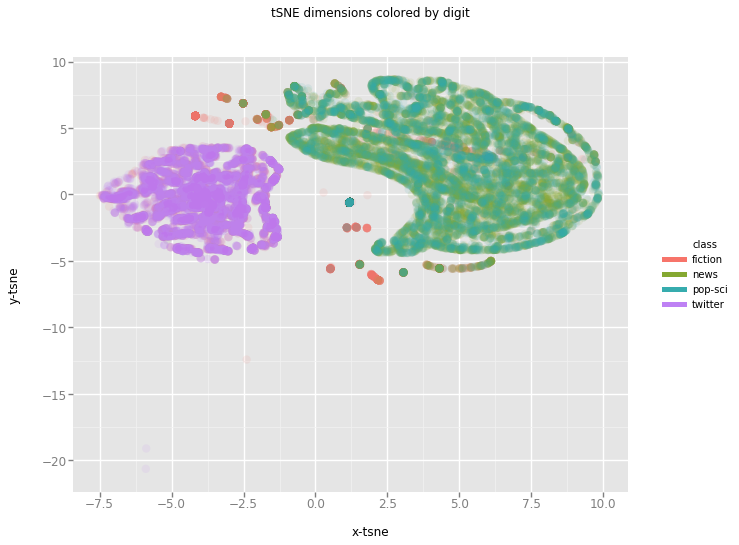

<ggplot: (-9223372036796813659)>

In [72]:
df_tsne = data4.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='class') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

# эксперименты

In [73]:
pca_16 = PCA(n_components=9)
pca_result_16 = pca_16.fit_transform(data[feat_cols].values)
print('Explained variation per principal component (PCA): {}'.format(np.sum(pca_16.explained_variance_ratio_)))

Explained variation per principal component (PCA): 0.999940142326492


In [74]:
n_sne = 35000

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=9, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_16[rndperm[:n_sne]])

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 28 nearest neighbors...
[t-SNE] Indexed 35000 samples in 0.236s...
[t-SNE] Computed neighbors for 35000 samples in 2.467s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35000
[t-SNE] Computed conditional probabilities for sample 2000 / 35000
[t-SNE] Computed conditional probabilities for sample 3000 / 35000
[t-SNE] Computed conditional probabilities for sample 4000 / 35000
[t-SNE] Computed conditional probabilities for sample 5000 / 35000
[t-SNE] Computed conditional probabilities for sample 6000 / 35000
[t-SNE] Computed conditional probabilities for sample 7000 / 35000
[t-SNE] Computed conditional probabilities for sample 8000 / 35000
[t-SNE] Computed conditional probabilities for sample 9000 / 35000
[t-SNE] Computed conditional probabilities for sample 10000 / 35000
[t-SNE] Computed conditional probabilities for sample 11000 / 35000
[t-SNE] Computed conditional probabilities for sample 12000 / 35000
[t-SNE] Computed conditional probabilities for sam

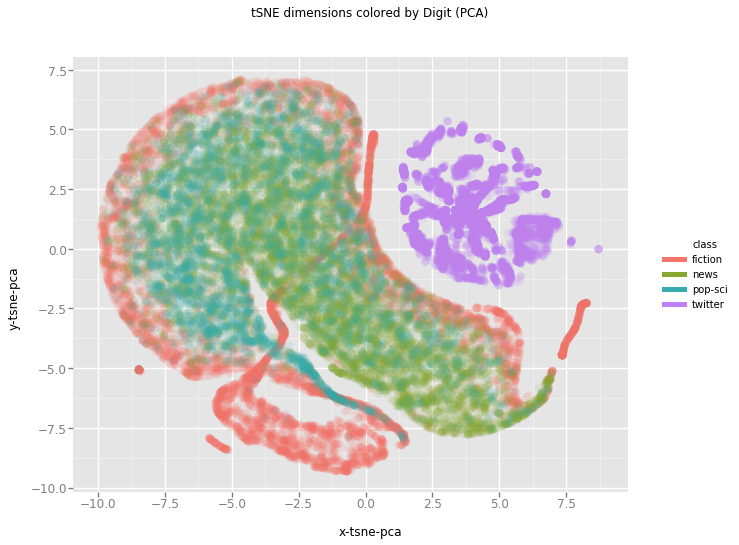

<ggplot: (-9223372036795986537)>

In [75]:
df_tsne = None
df_tsne = data.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne-pca', y='y-tsne-pca', color='class') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by Digit (PCA)")
chart

# классификация

In [77]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

In [ ]:
labels = ['nodes_synt', 'edges_synt', 'radius_synt', 'diameter_synt', 'average_clustering_synt', 'transitivity_synt', 'density_synt', 'degree_pearson_correlation_coefficien_syntt', 'nodes_flat', 'edges_flat', 'radius_flat', 'diameter_flat', 'average_clustering_flat', 'transitivity_flat', 'density_flat', 'degree_pearson_correlation_coefficient_flat', 'class']


In [78]:
X, y = data[labels[:-1]], data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
le = LabelEncoder()
le.fit(y)
le.classes_

array(['fiction', 'news', 'pop-sci', 'twitter'], dtype=object)

In [80]:
y_train_vec = np.array(le.transform(y_train))
y_test_vec = np.array(le.transform(y_test))


In [81]:
clf = RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False)
clf.fit(X_train,y_train_vec)
predictions = clf.predict(X_test)
print('Finished training!')
print("Precision: {0:6.2f}".format(precision_score(y_test_vec, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test_vec, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test_vec, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test_vec, predictions)))
print(classification_report(y_test_vec, predictions))


Finished training!
Precision:   0.78
Recall:   0.73
F1-measure:   0.72
Accuracy:   0.80
             precision    recall  f1-score   support

          0       0.81      0.89      0.85      3302
          1       0.67      0.81      0.73      3332
          2       0.64      0.21      0.32      1619
          3       1.00      1.00      1.00      3297

avg / total       0.80      0.80      0.78     11550



In [82]:
clf5 = MLPClassifier(activation='identity',solver='lbfgs', learning_rate='adaptive')
clf5.fit(X_train,y_train_vec)
predictions = clf5.predict(X_test)
print('Finished training!')
print("Precision: {0:6.2f}".format(precision_score(y_test_vec, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test_vec, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test_vec, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test_vec, predictions)))
print(classification_report(y_test_vec, predictions))

Finished training!
Precision:   0.81
Recall:   0.79
F1-measure:   0.79
Accuracy:   0.85
             precision    recall  f1-score   support

          0       0.93      0.94      0.94      3302
          1       0.72      0.83      0.77      3332
          2       0.58      0.37      0.45      1619
          3       1.00      1.00      1.00      3297

avg / total       0.84      0.85      0.84     11550



In [84]:
clf2 = RandomForestClassifier(n_estimators=20, class_weight="balanced",random_state=42, n_jobs =-1)
clf2.fit(X_train,y_train_vec)
predictions = clf2.predict(X_test)
print('Finished training!')
print("Precision: {0:6.2f}".format(precision_score(y_test_vec, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test_vec, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test_vec, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test_vec, predictions)))
print(classification_report(y_test_vec, predictions))

Finished training!
Precision:   0.85
Recall:   0.82
F1-measure:   0.83
Accuracy:   0.88
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3302
          1       0.76      0.90      0.82      3332
          2       0.67      0.41      0.51      1619
          3       1.00      1.00      1.00      3297

avg / total       0.88      0.88      0.87     11550



In [85]:
clf3 = SVC(class_weight="balanced", kernel = "linear", random_state =42, probability=True)
clf3.fit(X_train,y_train_vec)
predictions = clf3.predict(X_test)
print('Finished training!')
print("Precision: {0:6.2f}".format(precision_score(y_test_vec, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test_vec, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test_vec, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test_vec, predictions)))
print(classification_report(y_test_vec, predictions))

Finished training!
Precision:   0.81
Recall:   0.82
F1-measure:   0.81
Accuracy:   0.84
             precision    recall  f1-score   support

          0       0.96      0.95      0.95      3302
          1       0.81      0.64      0.72      3332
          2       0.49      0.71      0.58      1619
          3       1.00      1.00      1.00      3297

avg / total       0.86      0.84      0.85     11550

